# 1. Importing Libraries

In [21]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, precision_score,precision_recall_fscore_support, roc_auc_score, log_loss, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import plot_tree


# 2. Reading Dataset

In [23]:
data = pd.read_csv("dataset.csv")
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


# 3. Exploratory Data Analysis

## Dataset Overview

In [4]:
data.shape

(4424, 35)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [6]:
pd.set_option('display.max_columns', None)
data.describe().round(3)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000
mean,1.179,6.887,1.728,9.899,0.891,2.531,1.255,12.322,16.455,7.318,7.819,0.548,0.012,0.114,0.881,0.352,0.248,23.265,0.025,0.710,6.271,8.299,4.707,10.641,0.138,0.542,6.232,8.063,4.436,10.230,0.150,11.566,1.228,0.002
std,0.606,5.299,1.314,4.332,0.312,3.964,1.748,9.026,11.045,3.998,4.857,0.498,0.107,0.317,0.324,0.478,0.432,7.588,0.156,2.361,2.480,4.179,3.094,4.844,0.691,1.919,2.196,3.948,3.015,5.211,0.754,2.664,1.383,2.270
min,1.000,1.000,0.000,1.000,0.000,1.000,1.000,1.000,1.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,17.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,7.600,-0.800,-4.060
25%,1.000,1.000,1.000,6.000,1.000,1.000,1.000,2.000,3.000,5.000,5.000,0.000,0.000,0.000,1.000,0.000,0.000,19.000,0.000,0.000,5.000,6.000,3.000,11.000,0.000,0.000,5.000,6.000,2.000,10.750,0.000,9.400,0.300,-1.700
50%,1.000,8.000,1.000,10.000,1.000,1.000,1.000,13.000,14.000,6.000,8.000,1.000,0.000,0.000,1.000,0.000,0.000,20.000,0.000,0.000,6.000,8.000,5.000,12.286,0.000,0.000,6.000,8.000,5.000,12.200,0.000,11.100,1.400,0.320
75%,1.000,12.000,2.000,13.000,1.000,1.000,1.000,22.000,27.000,10.000,10.000,1.000,0.000,0.000,1.000,1.000,0.000,25.000,0.000,0.000,7.000,10.000,6.000,13.400,0.000,0.000,7.000,10.000,6.000,13.333,0.000,13.900,2.600,1.790
max,6.000,18.000,9.000,17.000,1.000,17.000,21.000,29.000,34.000,32.000,46.000,1.000,1.000,1.000,1.000,1.000,1.000,70.000,1.000,20.000,26.000,45.000,26.000,18.875,12.000,19.000,23.000,33.000,20.000,18.571,12.000,16.200,3.700,3.510


In [6]:
# check total null values
data.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

In [7]:
# check if values duplicated
data.duplicated().sum()

0

In [24]:
data['Target'] = data['Target'].map({
    'Dropout':0,
    'Enrolled':1,
    'Graduate':2
})

data_no_outliers = data.copy()

## Target Distribution

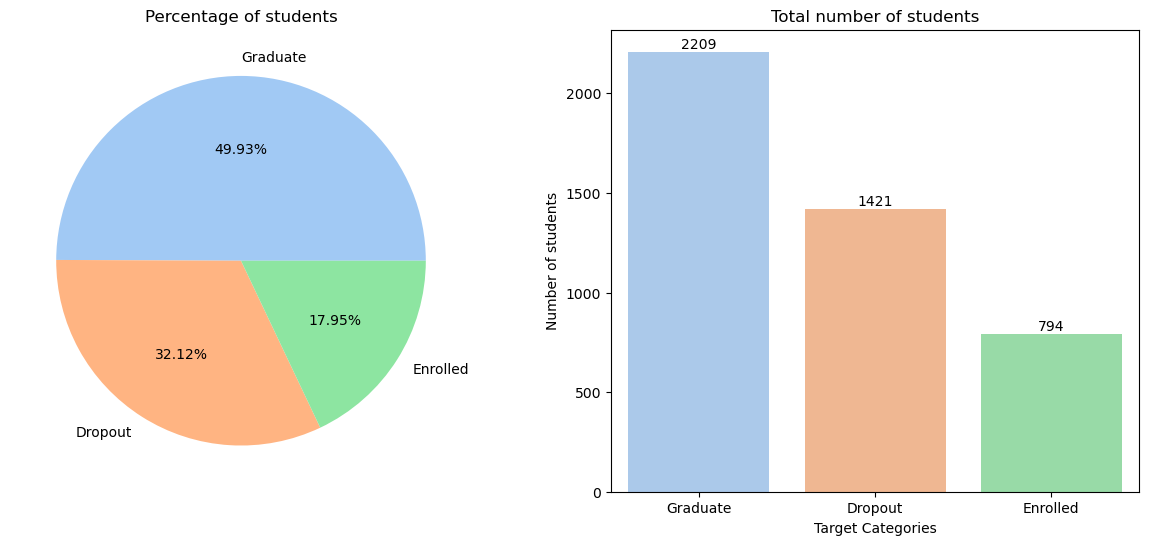

In [4]:
data_pie = data['Target'].value_counts()

label_mapping = {0: 'Dropout', 1: 'Enrolled', 2: 'Graduate'}
data_pie_labels = data_pie.index.map(label_mapping)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

ax1.pie(data_pie, labels=data_pie_labels, autopct="%.2f%%", colors=sns.color_palette('pastel'))
ax1.set_title('Percentage of students')

ax2 = sns.barplot(x=data_pie_labels, y=data_pie.values, palette="pastel")
ax2.set(xlabel='Target Categories', ylabel='Number of students')
ax2.set_title('Total number of students')
ax2.bar_label(container=ax2.containers[0], labels=data_pie.values, fontsize=10, color='black')

plt.show()

### Gender

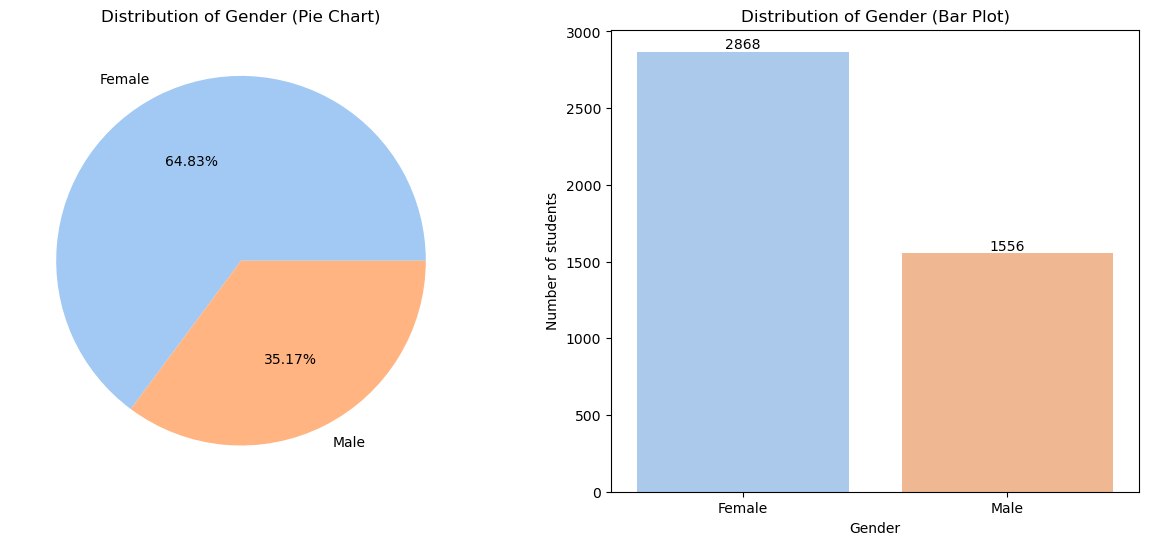

In [10]:
data_gender = data['Gender'].value_counts()

gender_mapping = {0: 'Female', 1: 'Male'}
data_gender_labels = data_gender.index.map(gender_mapping)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

ax1.pie(data_gender, labels=data_gender_labels, autopct="%.2f%%", colors=sns.color_palette('pastel'))
ax1.set_title('Distribution of Gender (Pie Chart)')

ax2 = sns.barplot(x=data_gender_labels, y=data_gender.values, palette="pastel")
ax2.set(xlabel='Gender', ylabel='Number of students')
ax2.set_title('Distribution of Gender (Bar Plot)')

ax2.bar_label(container=ax2.containers[0], labels=data_gender.values, fontsize=10, color='black')

plt.show()

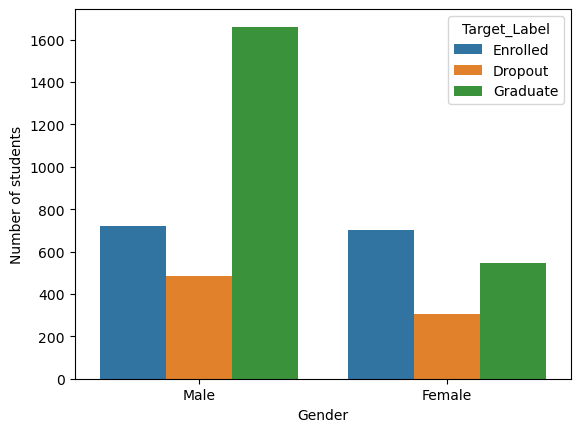

In [11]:
target_labels = {0: 'Enrolled', 1: 'Dropout', 2: 'Graduate'}
data['Target_Label'] = data['Target'].map(target_labels)

sns.countplot(data=data, x='Gender', hue='Target_Label', order=[0, 1], hue_order=['Enrolled', 'Dropout', 'Graduate'])
plt.xticks(ticks=[0, 1], labels=['Male', 'Female'])
plt.ylabel('Number of students')
plt.show()

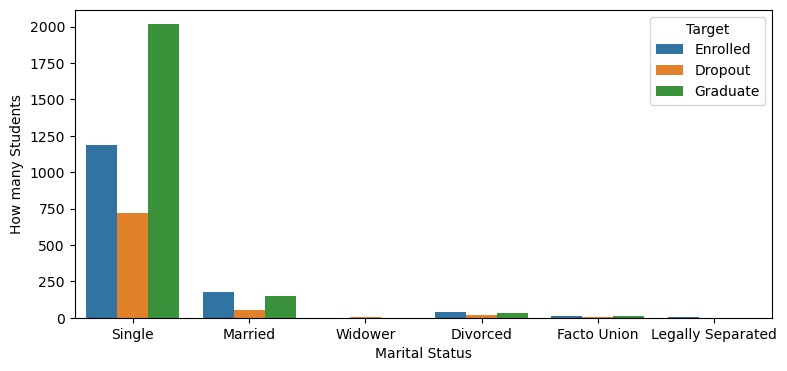

In [18]:
plt.figure(figsize=(9, 4))

sns.countplot(data=data, x='Marital status', hue='Target')

plt.xticks(ticks=[0, 1, 2, 3, 4, 5], labels=['Single', 'Married', 'Widower', 'Divorced', 'Facto Union', 'Legally Separated'])
plt.xlabel('Marital Status')
plt.ylabel('How many Students')

target_labels = ['Enrolled', 'Dropout', 'Graduate']
plt.legend(title='Target', labels=target_labels)

plt.show()


# 4. Data Preprocessing

## Heatmap Correlation

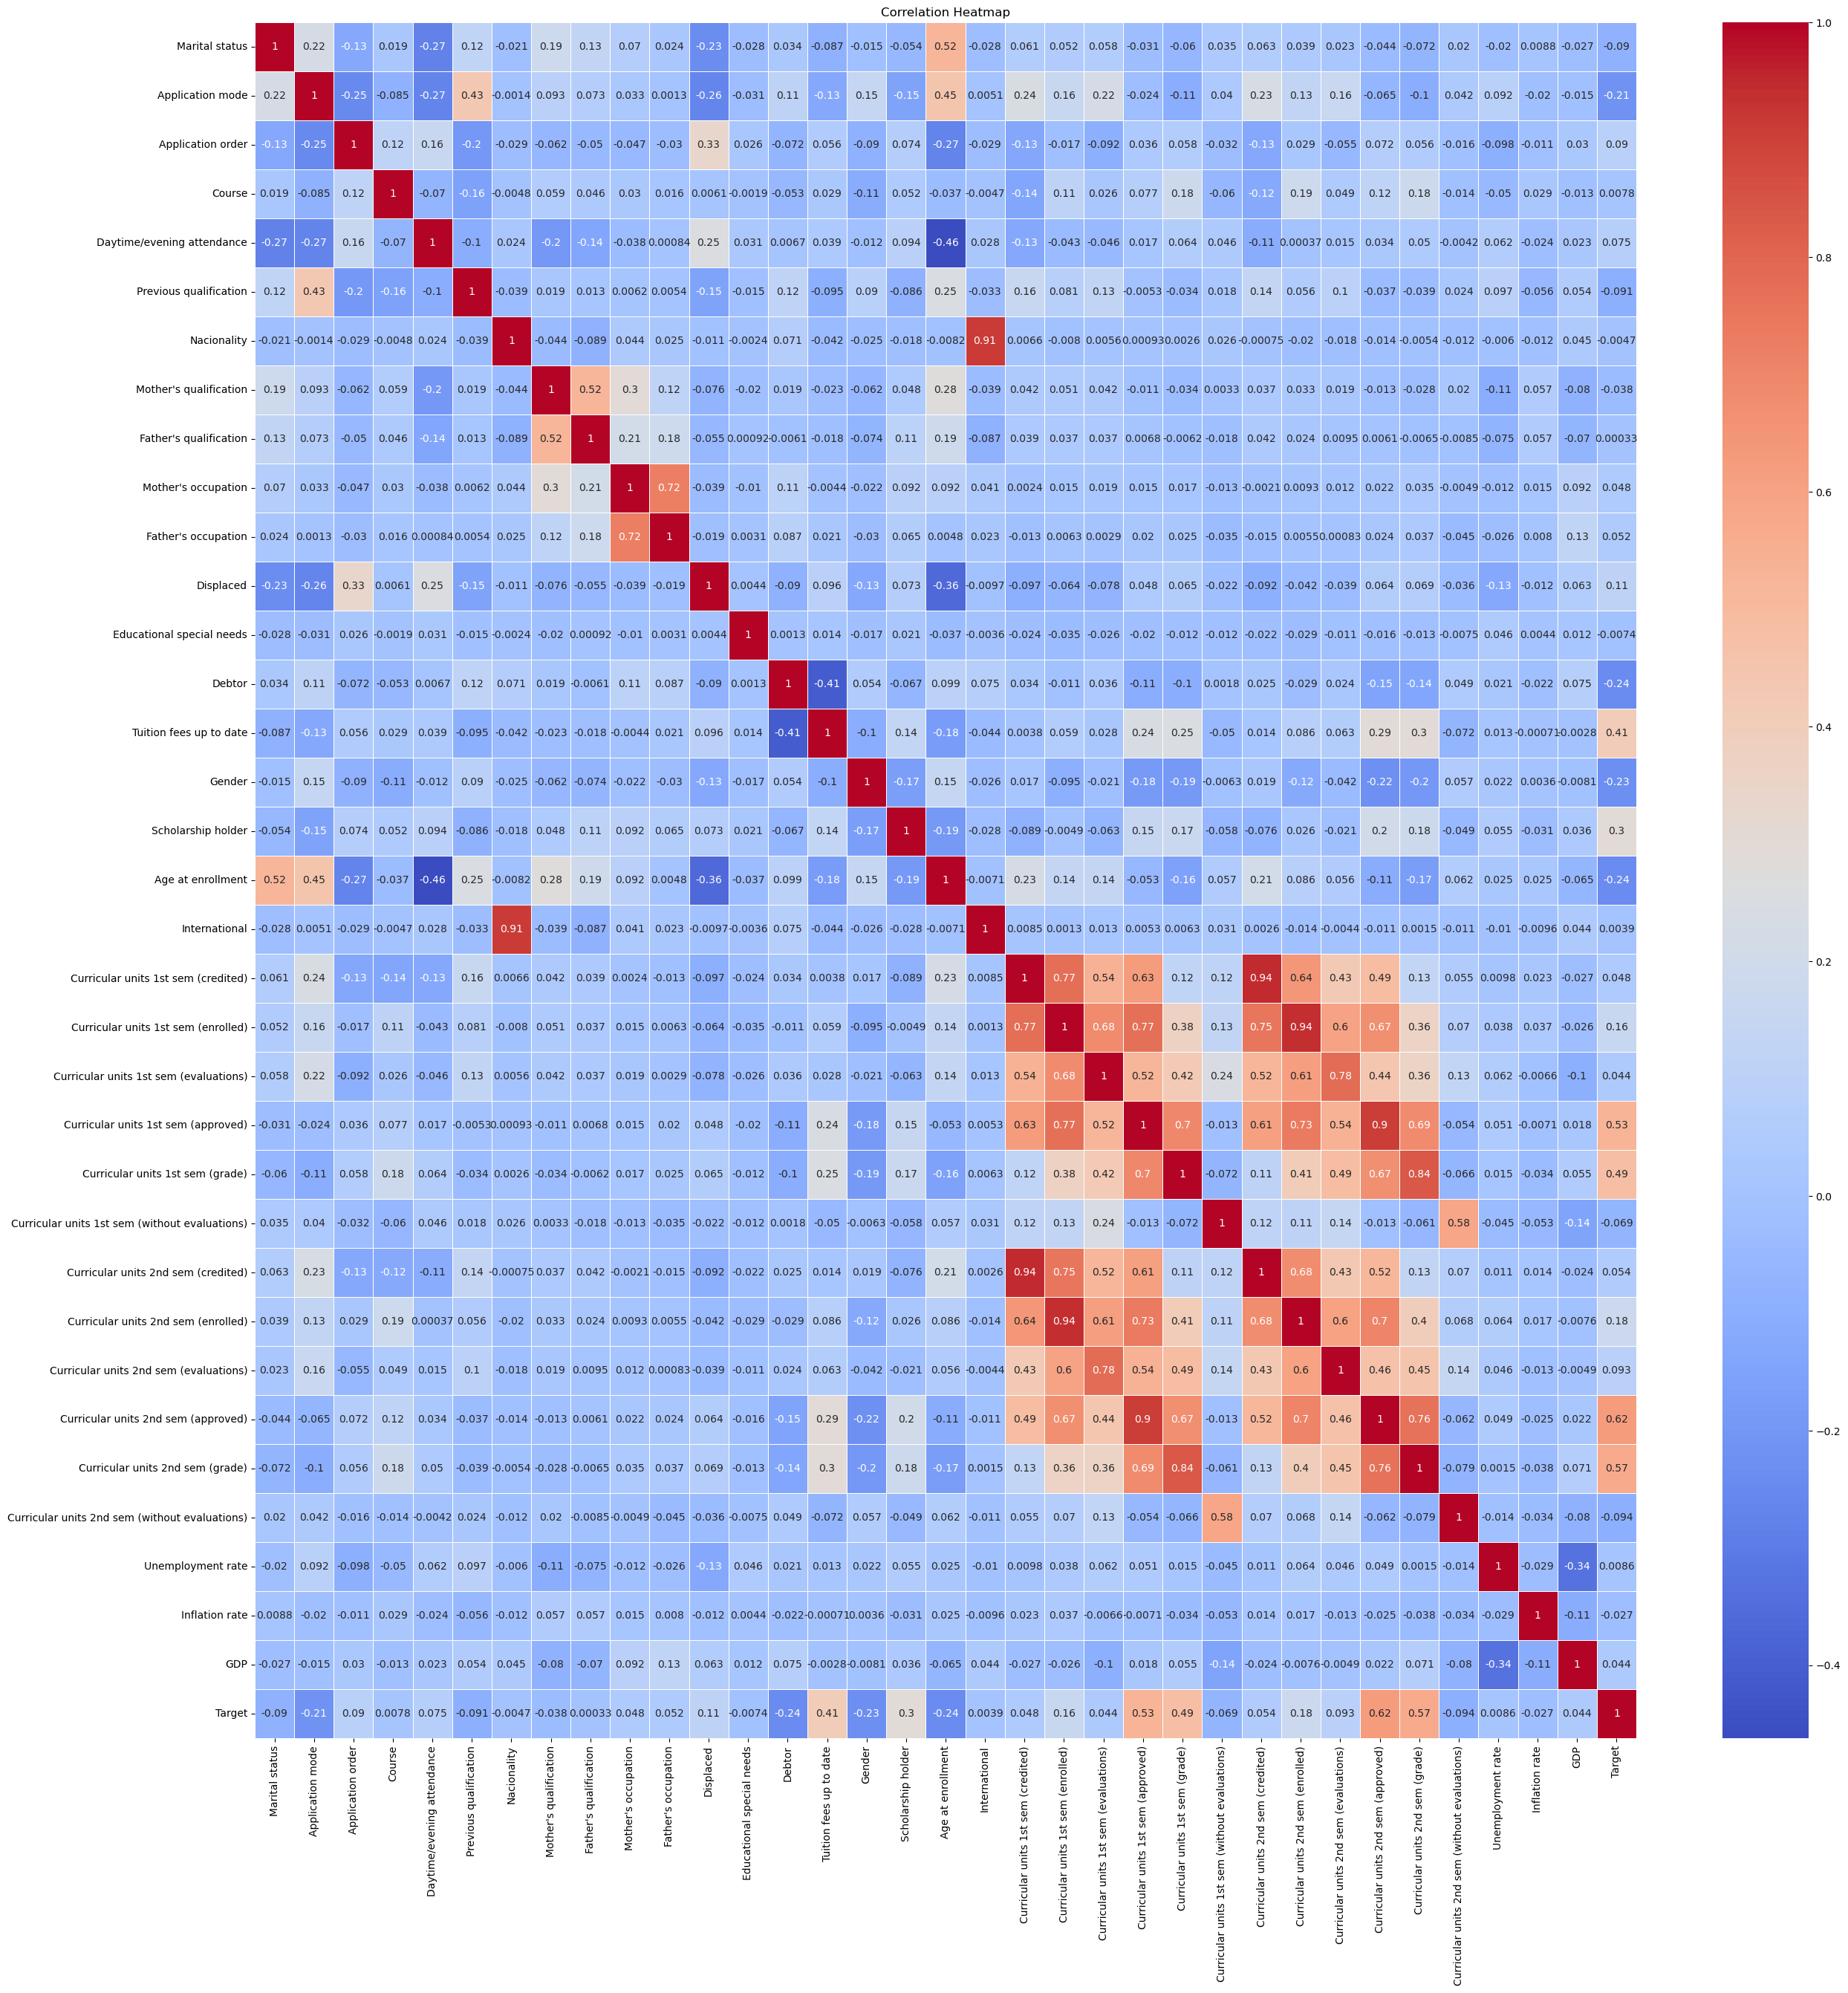

In [73]:
plt.figure(figsize=(30, 30))
sns.heatmap(data.corr() , annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

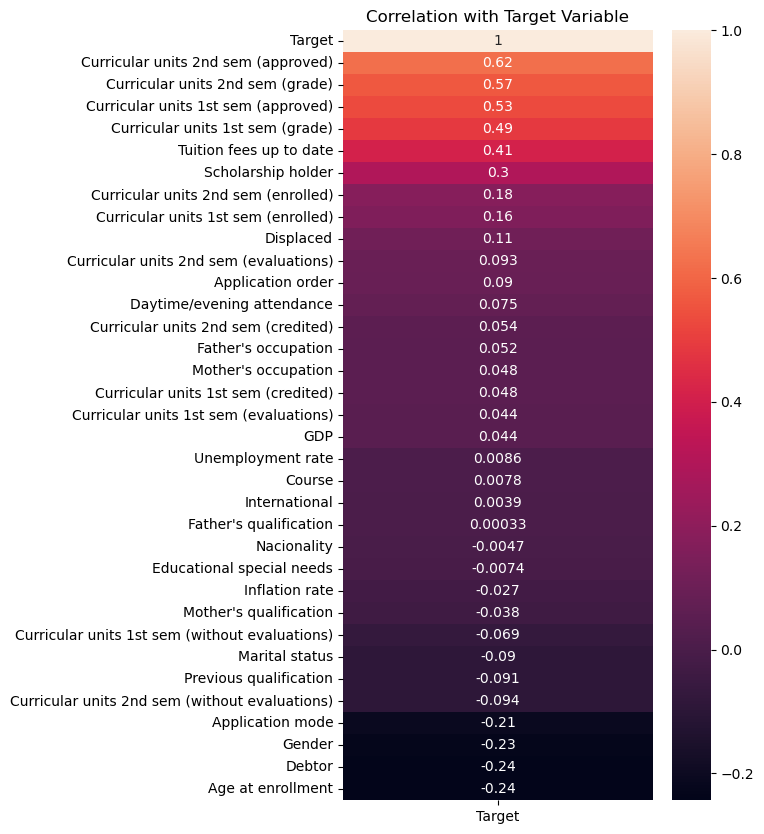

In [5]:
data_2 = pd.read_csv("dataset.csv")

data_2.replace("Dropout",0,inplace=True)
data_2.replace("Enrolled",1,inplace=True)
data_2.replace("Graduate",2,inplace=True)


plt.figure(figsize = (5,10))
sns.heatmap(data_2.corr()[['Target']].sort_values(by='Target', ascending=False), annot = True)
plt.title('Correlation with Target Variable')
plt.show()

Selected Features: Index(['Application order', 'Course', 'Daytime/evening attendance',
       'Father's qualification', 'Mother's occupation', 'Father's occupation',
       'Displaced', 'Tuition fees up to date', 'Scholarship holder',
       'International', 'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)', 'Unemployment rate', 'GDP',
       'Target'],
      dtype='object')


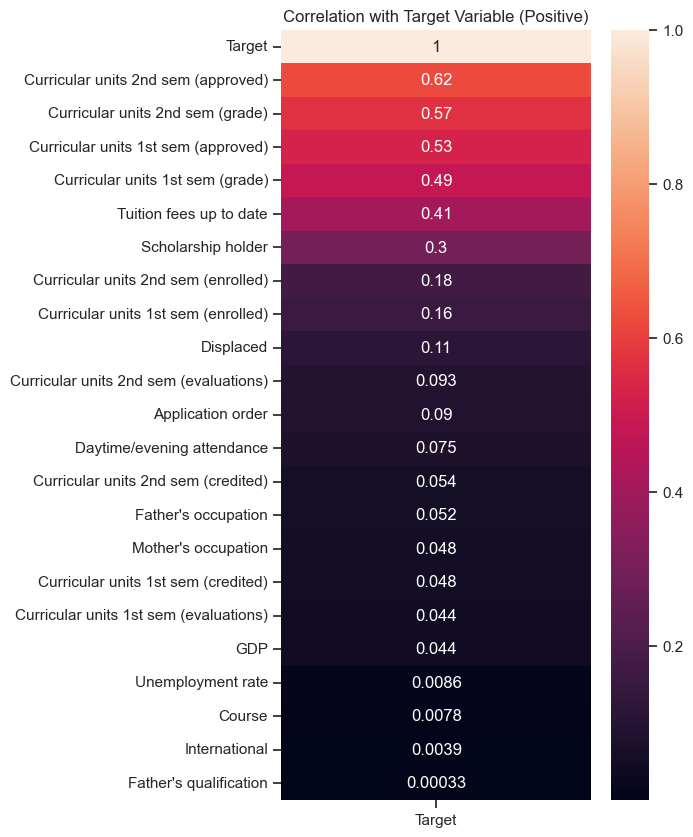

In [25]:
data_2 = data.copy()

data_2.replace("Dropout", 0, inplace=True)
data_2.replace("Enrolled", 1, inplace=True)
data_2.replace("Graduate", 2, inplace=True)

correlation_matrix = data_2.corr()

positive_correlation_features = correlation_matrix['Target'][correlation_matrix['Target'] > 0].index

data_no_outliers = data_2[positive_correlation_features]

print("Selected Features:", positive_correlation_features)

plt.figure(figsize=(5, 10))
sns.heatmap(data_no_outliers.corr()[['Target']].sort_values(by='Target', ascending=False), annot=True)
plt.title('Correlation with Target Variable (Positive)')
plt.show()


## Box Plot

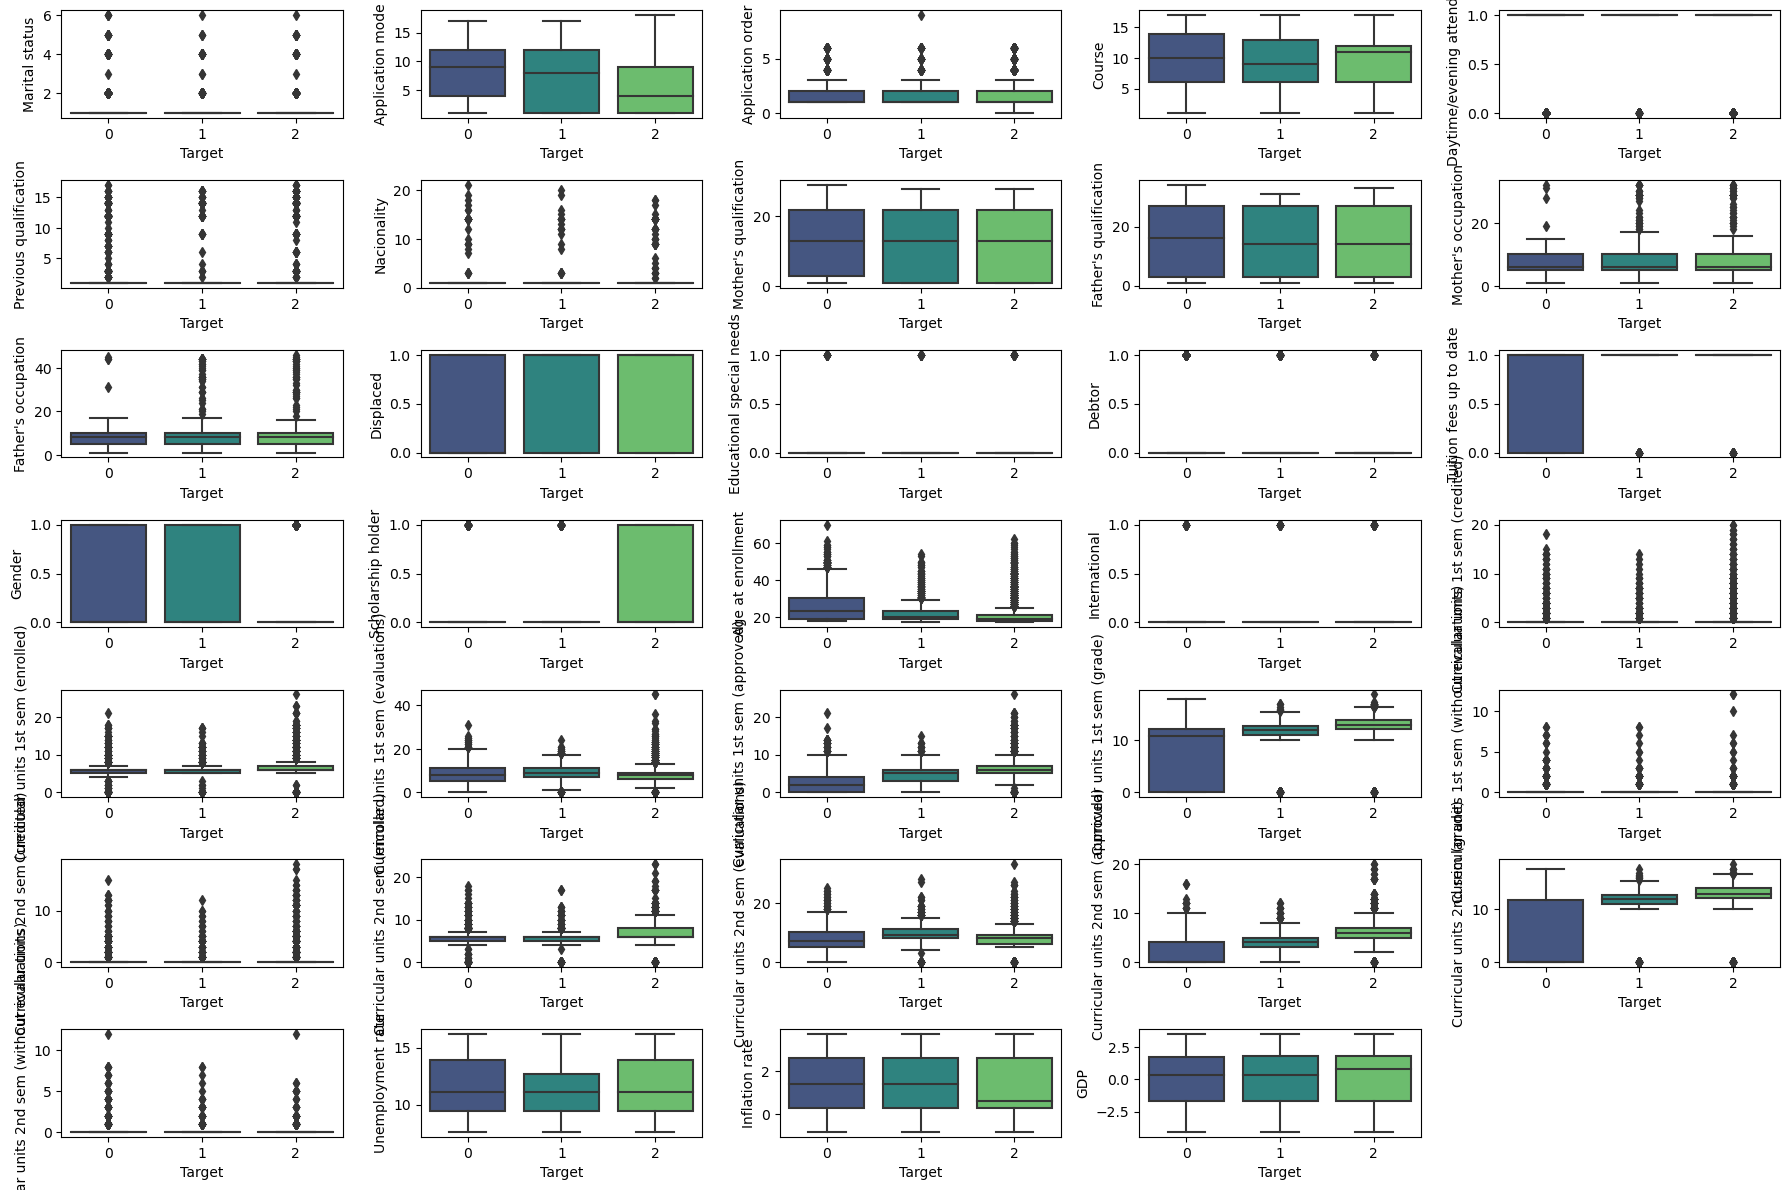

In [6]:
plt.figure(figsize=(18, 12))
gs = GridSpec(7, 5)

for i, col in enumerate(data_no_outliers.columns[:-1]):
    ax = plt.subplot(gs[i])
    sns.boxplot(x='Target', y=col, data=data_no_outliers, palette='viridis')
    ax.set_xlabel('Target', fontsize=10)
    ax.set_ylabel(col, fontsize=10)

plt.tight_layout()
plt.show()


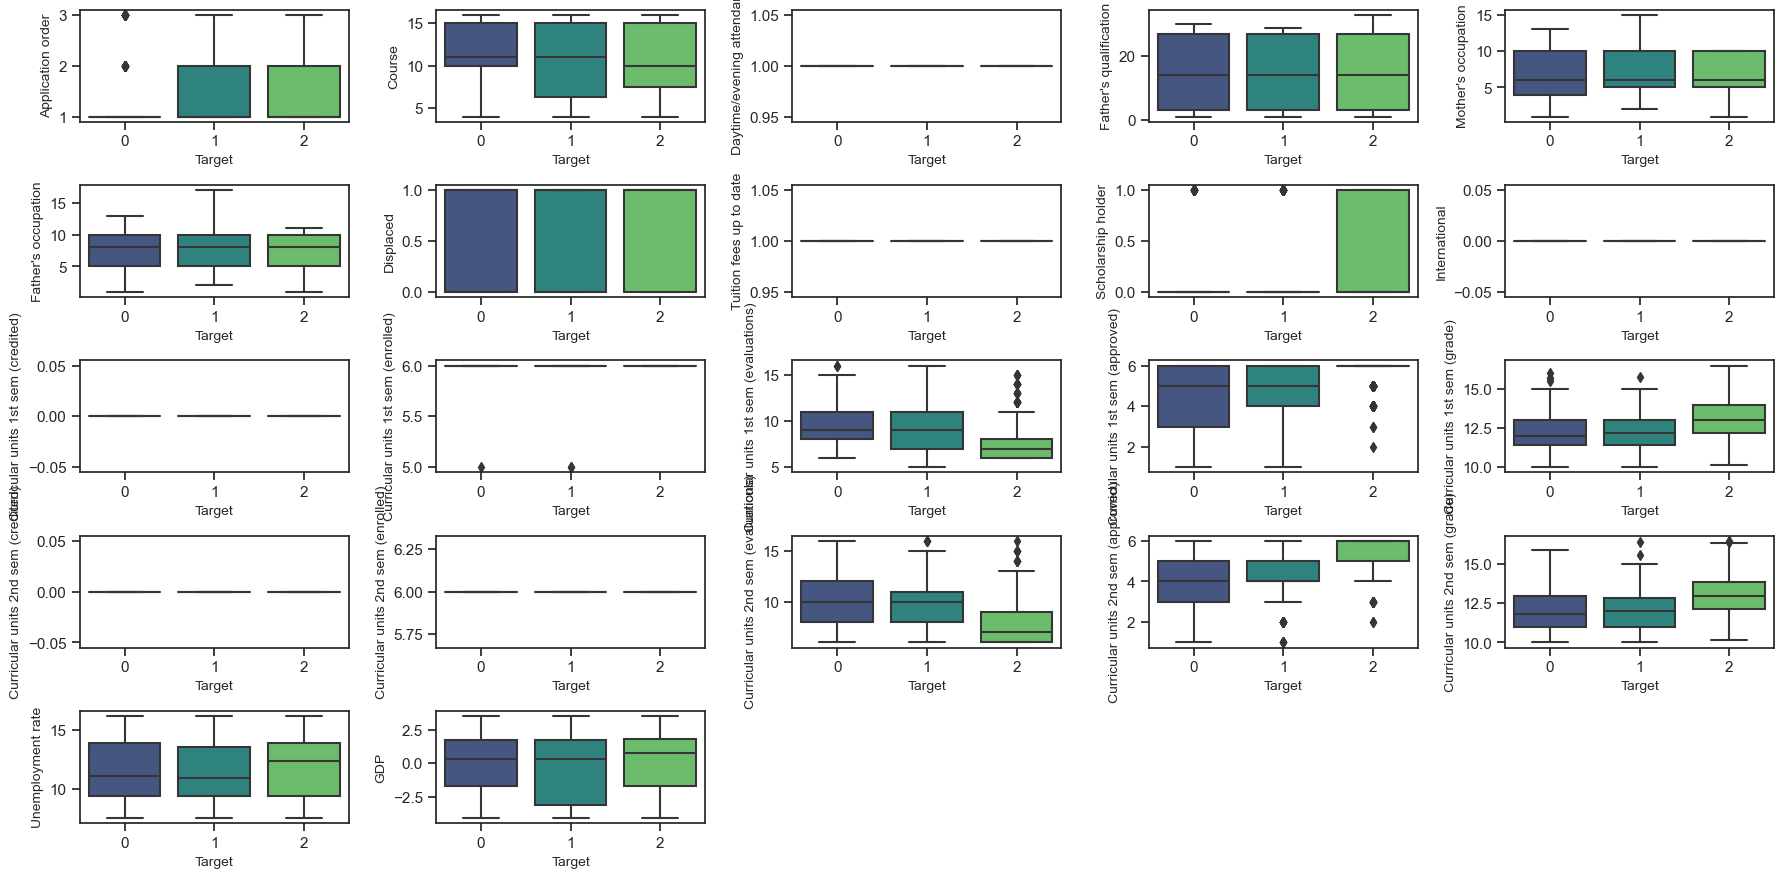

In [26]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

for col in data_no_outliers.columns[:-1]:
    data_no_outliers = remove_outliers_iqr(data_no_outliers, col)

plt.figure(figsize=(18, 12))
gs = GridSpec(7, 5)

for i, col in enumerate(data_no_outliers.columns[:-1]):
    ax = plt.subplot(gs[i])
    sns.boxplot(x='Target', y=col, data=data_no_outliers, palette='viridis')
    ax.set_xlabel('Target', fontsize=10)
    ax.set_ylabel(col, fontsize=10)

plt.tight_layout()
plt.show()

In [20]:
data.shape

(4424, 35)

In [27]:
data_no_outliers.shape

(1024, 23)

## Pair Plot

In [28]:
columns_to_select = ["Curricular units 2nd sem (approved)", "Curricular units 1st sem (grade)",
                     "Curricular units 1st sem (approved)", "Curricular units 2nd sem (grade)",
                     "Tuition fees up to date", "Scholarship holder", "Curricular units 2nd sem (enrolled)","Target"]

data_important = data_no_outliers[columns_to_select]

In [29]:
data_important.shape

(1024, 8)

In [18]:
# sns.set(style="ticks")
# sns.pairplot(data_important, hue="Target", palette="Set1", diag_kind="kde", markers=["o", "s", "D"])

# plt.suptitle('Pair Plot of Features by Target', y=1.02, fontsize=16)
# plt.show()

In [33]:
X = data_no_outliers.drop('Target', axis=1)
y = data_no_outliers['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 5. Model Selection and Training

## 1-  K-Nearest Neighbors

Best Parameters: {'n_neighbors': 11}
Accuracy: 0.75
Precision: 0.73
Recall: 0.75
F1-score: 0.73


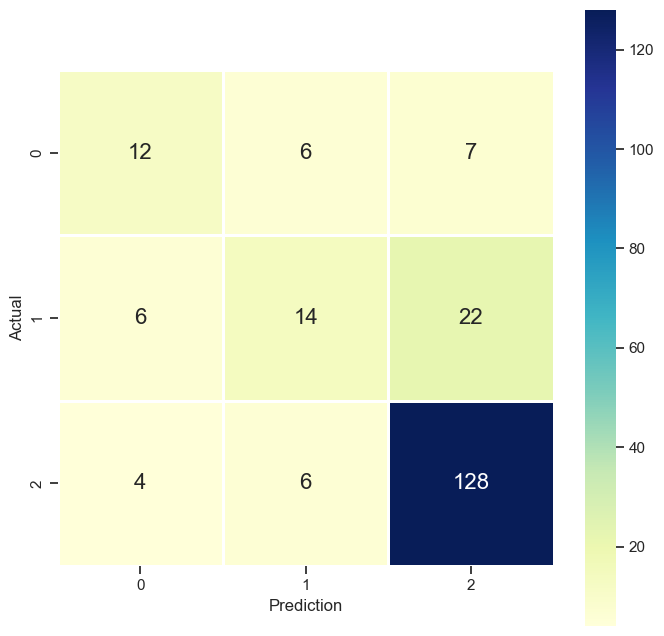

In [34]:
knn = KNeighborsClassifier()

param_grid = {'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17]}  

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)


best_params = grid_search.best_params_
print("Best Parameters:", best_params)


best_knn = KNeighborsClassifier(n_neighbors=best_params['n_neighbors'])
best_knn.fit(X_train, y_train)

y_pred = best_knn.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(cm, fmt=".0f", cmap="YlGnBu", linewidth=1, square=True, annot=True, annot_kws={"fontsize": 16}, ax=ax)
ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")
plt.show()


## 2- Logistic Regression

## 3- Decision Tree

## 4- Random Forest

Best Parameters: {'max_depth': 5, 'n_estimators': 50}
Accuracy: 0.74
Precision: 0.70
Recall: 0.74
F1-score: 0.71


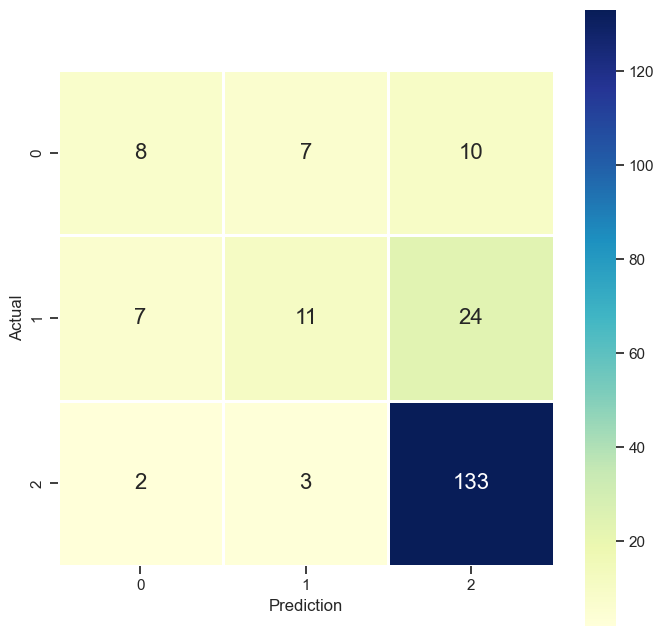

In [35]:
rf = RandomForestClassifier()
param_grid = {'n_estimators': [50, 100, 150, 200], 'max_depth': [5, 10, 20, 30]}
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)

best_rf = RandomForestClassifier(n_estimators=best_params['n_estimators'], max_depth=best_params['max_depth'])
best_rf.fit(X_train, y_train)

y_pred = best_rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(cm, fmt=".0f", cmap="YlGnBu", linewidth=1, square=True, annot=True, annot_kws={"fontsize": 16}, ax=ax)

ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")
plt.show()

## 5- SVM

## 6- Gradient Boosting || Naive Bayes

# 7. Model Evaluation and Comparison